## Predicting wages
### Ensemble model

Read the data and sneak a peek into it

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" #default 'last_expr'
import pandas as pd
import numpy as np

data = pd.read_csv('wage2015.csv', index_col=False, header=0)
data.head(5)
data.describe()

,wage,lwage,sex,white,black,hisp,shs,hsg,scl,clg,...,health,age,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,...,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000
mean,18.145961,2.730945,0.542805,0.696070,0.189179,0.222887,0.064661,0.308734,0.301567,0.236513,...,0.717650,33.703158,12.064897,2.762380,8.145416,27.794773,8440.043554,12.966449,7771.903836,13.266598
std,10.466483,0.625985,0.498184,0.459971,0.391666,0.416200,0.245936,0.461989,0.458956,0.424957,...,0.450161,11.347140,11.431822,4.490614,19.186165,91.651419,19443.325548,6.647292,11658.013997,5.902888
min,0.001923,-6.253829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,170.000000,1.000000
25%,10.576923,2.358675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,25.000000,3.000000,0.090000,0.027000,0.008100,2340.000000,8.000000,4970.000000,9.000000
50%,15.384615,2.733368,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,30.000000,8.000000,0.640000,0.512000,0.409600,4700.000000,15.000000,7380.000000,14.000000
75%,23.237179,3.145754,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,40.000000,19.000000,3.610000,6.859000,13.032100,6220.000000,17.000000,8290.000000,18.000000
max,58.119658,4.062504,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,85.000000,65.500000,42.902500,281.011375,1840.624506,100000.000000,22.000000,100000.000000,23.000000


Correlation between predictors

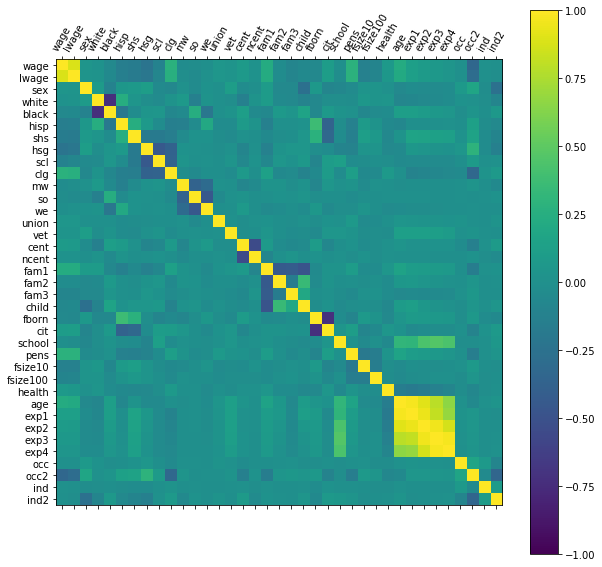

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,data.shape[1],1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns,rotation=60)
ax.set_yticklabels(data.columns)
plt.show();

Data wrangling: one-hot encodings

In [3]:
datay = data.lwage
datax=data.drop(['wage','lwage','occ','occ2','ind','ind2', 'exp2', 'exp3', 'exp4'],axis=1)
#Occupations and industry are categorical. Do one-hot encodings
occ2 = data.loc[:,'occ2']-1 #-1 because min(occ2) is 1, not 0
ind2 = data.loc[:,'ind2']-1 
dataocc2s = pd.get_dummies(occ2,prefix='ocx2',prefix_sep='')
dataind2s = pd.get_dummies(ind2,prefix='int2',prefix_sep='');
datax = pd.concat((datax, dataocc2s,dataind2s), axis=1)
datax.shape
datax.head()

,sex,white,black,hisp,shs,hsg,scl,clg,mw,so,...,int213,int214,int215,int216,int217,int218,int219,int220,int221,int222
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split in train and test

In [4]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.5, random_state=0)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Fit a bunch of regression algorithms

In [5]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
#from sklearn import neural_network
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics

fitLM = LinearRegression(fit_intercept=1).fit(x_train,y_train)
fitLM.intercept_;fitLM.coef_[50:];
y_predLM = fitLM.predict(x_test);
print "MSE linear model:",metrics.mean_squared_error(y_test, y_predLM)
print "R2 linear model:",metrics.r2_score(y_test, y_predLM)

rLasso = Lasso().fit(x_train,y_train)
y_predLasso = rLasso.predict(x_test)
print "MSE lasso model:",metrics.mean_squared_error(y_test, y_predLasso)
print "R2 lasso model:",metrics.r2_score(y_test, y_predLasso)

rLassoCV = LassoCV().fit(x_train,y_train)
y_predLassoCV = rLassoCV.predict(x_test)
print "MSE lassoCV model:",metrics.mean_squared_error(y_test, y_predLassoCV)
print "R2 lassoCV model:",metrics.r2_score(y_test, y_predLassoCV)

rRidge = Ridge().fit(x_train,y_train)
y_predRidge = rRidge.predict(x_test)
print "MSE Ridge model:",metrics.mean_squared_error(y_test, y_predRidge)
print "R2 Ridge model:",metrics.r2_score(y_test, y_predRidge)

rRidgeCV = RidgeCV().fit(x_train,y_train)
y_predRidgeCV = rRidgeCV.predict(x_test)
print "MSE RidgeCV model:",metrics.mean_squared_error(y_test, y_predRidgeCV)
print "R2 RidgeCV model:",metrics.r2_score(y_test, y_predRidgeCV)

rElasticNet = ElasticNet(l1_ratio=0.5).fit(x_train,y_train)
y_predElasticNet = rElasticNet.predict(x_test)
print "MSE ElasticNet model:",metrics.mean_squared_error(y_test, y_predElasticNet)
print "R2 ElasticNet model:",metrics.r2_score(y_test, y_predElasticNet)

rElasticNetCV = ElasticNetCV().fit(x_train,y_train)
y_predElasticNetCV = rElasticNetCV.predict(x_test)
print "MSE ElasticNetCV model:",metrics.mean_squared_error(y_test, y_predElasticNetCV)
print "R2 ElasticNetCV model:",metrics.r2_score(y_test, y_predElasticNetCV)

rRF = RandomForestRegressor(n_estimators=2000, min_samples_leaf=5).fit(x_train,y_train)
y_predRF = rRF.predict(x_test)
print "MSE RandomForest model:",metrics.mean_squared_error(y_test, y_predRF)
print "R2 RandomForest model:",metrics.r2_score(y_test, y_predRF)

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 5,
          'learning_rate': 0.01, 'loss': 'ls'}
rBoost = GradientBoostingRegressor(**params).fit(x_train,y_train)
y_predBoost = rBoost.predict(x_test)
print "MSE BoostedTrees model:",metrics.mean_squared_error(y_test, y_predBoost)
print "R2 BoostedTrees model:",metrics.r2_score(y_test, y_predBoost)

'''
Model - MSE/R2 found - MSE/R2 in R
MSE linear model: 0.272057253969 0.253
R2 linear model: 0.312417172586 0.340
MSE lasso model: 0.384517090145 0.260
R2 lasso model: 0.0281922493386 0.016
MSE lassoCV model: 0.274573768353 0.273
R2 lassoCV model: 0.306057069886 0.017
MSE Ridge model: 0.272024003919 0.281
R2 Ridge model: 0.31250120697 0.016
MSE RidgeCV model: 0.27188497366 0.285
R2 RidgeCV model: 0.312852584545 0.016
MSE ElasticNet model: 0.379553821047 0.271
R2 ElasticNet model: 0.0407361479113 0.017
MSE ElasticNetCV model: 0.274591026107 
R2 ElasticNetCV model: 0.30601345357
MSE RandomForest model: 0.280800183886 0.249
R2 RandomForest model: 0.290320763157 0.015
MSE BoostedTrees model: 0.272386320796 0.259
R2 BoostedTrees model: 0.311585506839 0.016
'''

MSE linear model: 0.272057222231
R2 linear model: 0.312417252801
MSE lasso model: 0.384517090145
R2 lasso model: 0.0281922493386
MSE lassoCV model: 0.274573768353
R2 lassoCV model: 0.306057069886
MSE Ridge model: 0.272024003919
R2 Ridge model: 0.31250120697
MSE RidgeCV model: 0.271884973661
R2 RidgeCV model: 0.312852584544
MSE ElasticNet model: 0.379553821047
R2 ElasticNet model: 0.0407361479113
MSE ElasticNetCV model: 0.274591026107
R2 ElasticNetCV model: 0.30601345357
MSE RandomForest model: 0.280586789302
R2 RandomForest model: 0.290860085116
MSE BoostedTrees model: 0.272385572505
R2 BoostedTrees model: 0.311587398031


'\nModel - MSE/R2 found - MSE/R2 in R\nMSE linear model: 0.272057253969 0.253\nR2 linear model: 0.312417172586 0.340\nMSE lasso model: 0.384517090145 0.260\nR2 lasso model: 0.0281922493386 0.016\nMSE lassoCV model: 0.274573768353 0.273\nR2 lassoCV model: 0.306057069886 0.017\nMSE Ridge model: 0.272024003919 0.281\nR2 Ridge model: 0.31250120697 0.016\nMSE RidgeCV model: 0.27188497366 0.285\nR2 RidgeCV model: 0.312852584545 0.016\nMSE ElasticNet model: 0.379553821047 0.271\nR2 ElasticNet model: 0.0407361479113 0.017\nMSE ElasticNetCV model: 0.274591026107 \nR2 ElasticNetCV model: 0.30601345357\nMSE RandomForest model: 0.280800183886 0.249\nR2 RandomForest model: 0.290320763157 0.015\nMSE BoostedTrees model: 0.272386320796 0.259\nR2 BoostedTrees model: 0.311585506839 0.016\n'

Ensemble model: linear fitting

In [6]:
#There is something wrong with this linear model in scikitlearn
x_Ens=np.column_stack((y_predLM, y_predLasso,y_predElasticNet,y_predRF,y_predBoost))
x_EnsConst=np.hstack((x_Ens,np.ones((len(x_Ens),1))))
fitEnsLM = LinearRegression(fit_intercept=0).fit(x_EnsConst,y_test)
#fitEnsLM.intercept_
fitEnsLM.coef_
#y_predEnsLM = fitEnsLM.predict(x_test)
#print "MSE ensamble linear model:",np.mean((y_test - y_predEnsLM) ** 2)     #MSE 
#print "R2 ensamble  linear model:", 1 - np.sum((y_test - y_predEnsLM) ** 2)/np.sum((y_test - np.mean(y_test))**2) #R2


array([ 0.48511196,  0.06916855, -0.12360535,  0.2552019 ,  0.27631582,
        0.11209098])

Ensemble model: linear fit  (statsmodels)

In [7]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant
x_Ens=np.column_stack((y_predLM, y_predLasso,y_predElasticNet,y_predRF,y_predBoost))
x_EnsConst=add_constant(x_Ens,prepend = False)
#Same Linear Model thing using statsmodels
result = sm.OLS(y_test, x_EnsConst).fit()   #Linear model on train data
result.summary()
y_predEnsLM = result.predict(x_EnsConst)
print "MSE ensamble linear model:",metrics.mean_squared_error(y_test, y_predEnsLM)
print "R2 ensamble linear model:",metrics.r2_score(y_test, y_predEnsLM)

MSE ensamble linear model: 0.26705034964
R2 ensamble linear model: 0.325071352489


/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Lasso does not converge, probably because there are too little methods 

In [8]:
lasso = Lasso(alpha=1).fit(x_Ens,y_test)
y_predEnsLasso = lasso.predict(x_Ens)
lasso.intercept_
lasso.coef_
print "MSE lasso model:",metrics.mean_squared_error(y_test, y_predLasso)
print "R2 lasso model:",metrics.r2_score(y_test, y_predLasso)

MSE lasso model: 0.384517090145
R2 lasso model: 0.0281922493386


Ensemble model: lasso fitting - Cannot make it work :(

In [9]:
import statsmodels.regression as lm
lasso = lm.linear_model.OLS.fit_regularized(L1_wt=1)
resultLasso=lasso.fit(x_Ens,y_test)
y_predEnsLasso = resultLasso.predict(x_Ens)
resultLasso.coef_
print "MSE ensamble lasso model:",metrics.mean_squared_error(y_test, y_predEnsLasso)
print "R2 ensamble lasso model:",metrics.r2_score(y_test, y_predEnsLasso)

TypeError: unbound method fit_regularized() must be called with OLS instance as first argument (got nothing instead)